## Using CMMTools to calculate X-Ray Scattering from a Tetracyanoplatinate Dimer



First, we need to import the stuff we need.

In [36]:
%reset -f
%load_ext autoreload
%autoreload 2

%config Completer.use_jedi = False

import numpy as np
import matplotlib 
%matplotlib notebook

import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.autolayout': True})

from ase import Atoms

# I am appending the CMMTools to the python PATH from relative to where this notebook is located.
# If you are doing this in a separate script, located elsewhere, make sure you have put the CMMTools in
# your own pythonpath. 
import sys
sys.path.append('../../')  
from cmm.xray.debye import Debye

# to make pretty colors for plot
def make_colors(c, colmap='viridis'):
    import matplotlib.pyplot as plt
    cmap = plt.get_cmap(colmap)
    colors = [cmap(1.*i/c) for i in range(c)]
    return colors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's create a TCP monomer geometry from the data in 10.2174/1877944103666140110230100. We'll use the Four-Component Dirac-Coulomb DFT results using PBE0.

In [37]:
pt_c = 199.53 / 100  # pm -> angstrom
c_n = 116.18 / 100
pt_n = pt_c + c_n

pos = np.array([[0, 0, 0],    # Pt
                [pt_c, 0, 0], # C
                [pt_n, 0, 0], # N
                [-pt_c, 0, 0],
                [-pt_n, 0, 0],
                [0, pt_c, 0],
                [0, pt_n, 0],
                [0, -pt_c, 0],
                [0, -pt_n, 0],
               ])
atoms = Atoms('Pt' + 4*'CN', positions=pos)

let's visually inspect if we've done it right. 

Requires nglview. Installation: https://github.com/nglviewer/nglview#installation 

Or you can skip this step and use your own visualization program of choice to look at the .xyz we will save later.

In [38]:
import nglview as nv
nv.show_ase(atoms)

NGLWidget()

That looks like TCP! 

Let's save an xyz of the monomer:

In [39]:
from ase.io import write
write('tcp_mono.xyz', atoms, plain=True)

Let's make a dimer 3 Å apart. 

In [40]:
atoms2 = atoms.copy()
atoms2.translate([0, 0, 3])
dimer = atoms + atoms2

nv.show_ase(dimer)

NGLWidget()

Ok, let's calculate the debye scattering from scanning the monomer-distance in, say, the range of 2.5 Å to 5 Å in steps of 0.25 Å.

In [44]:
steps = np.arange(2.5, 5.25, 0.25)
# initialize Debye object. It's important you choose a q-range that balances resolution and time it will 
# take later to calculate the scattering / calculate residuals in the fitting procedure.
deb = Debye(qvec=np.arange(0.0, 10, 0.01))  #

# initialize array for scattering
s = np.zeros((len(steps), len(deb.qvec)))

for i, step in enumerate(steps):
    atoms2 = atoms.copy()  # same procedure as before...
    atoms2.translate([0, 0, step])
    dimer = atoms + atoms2
    s[i, :] = deb.debye(dimer)


Lets plot the results!

<IPython.core.display.Javascript object>


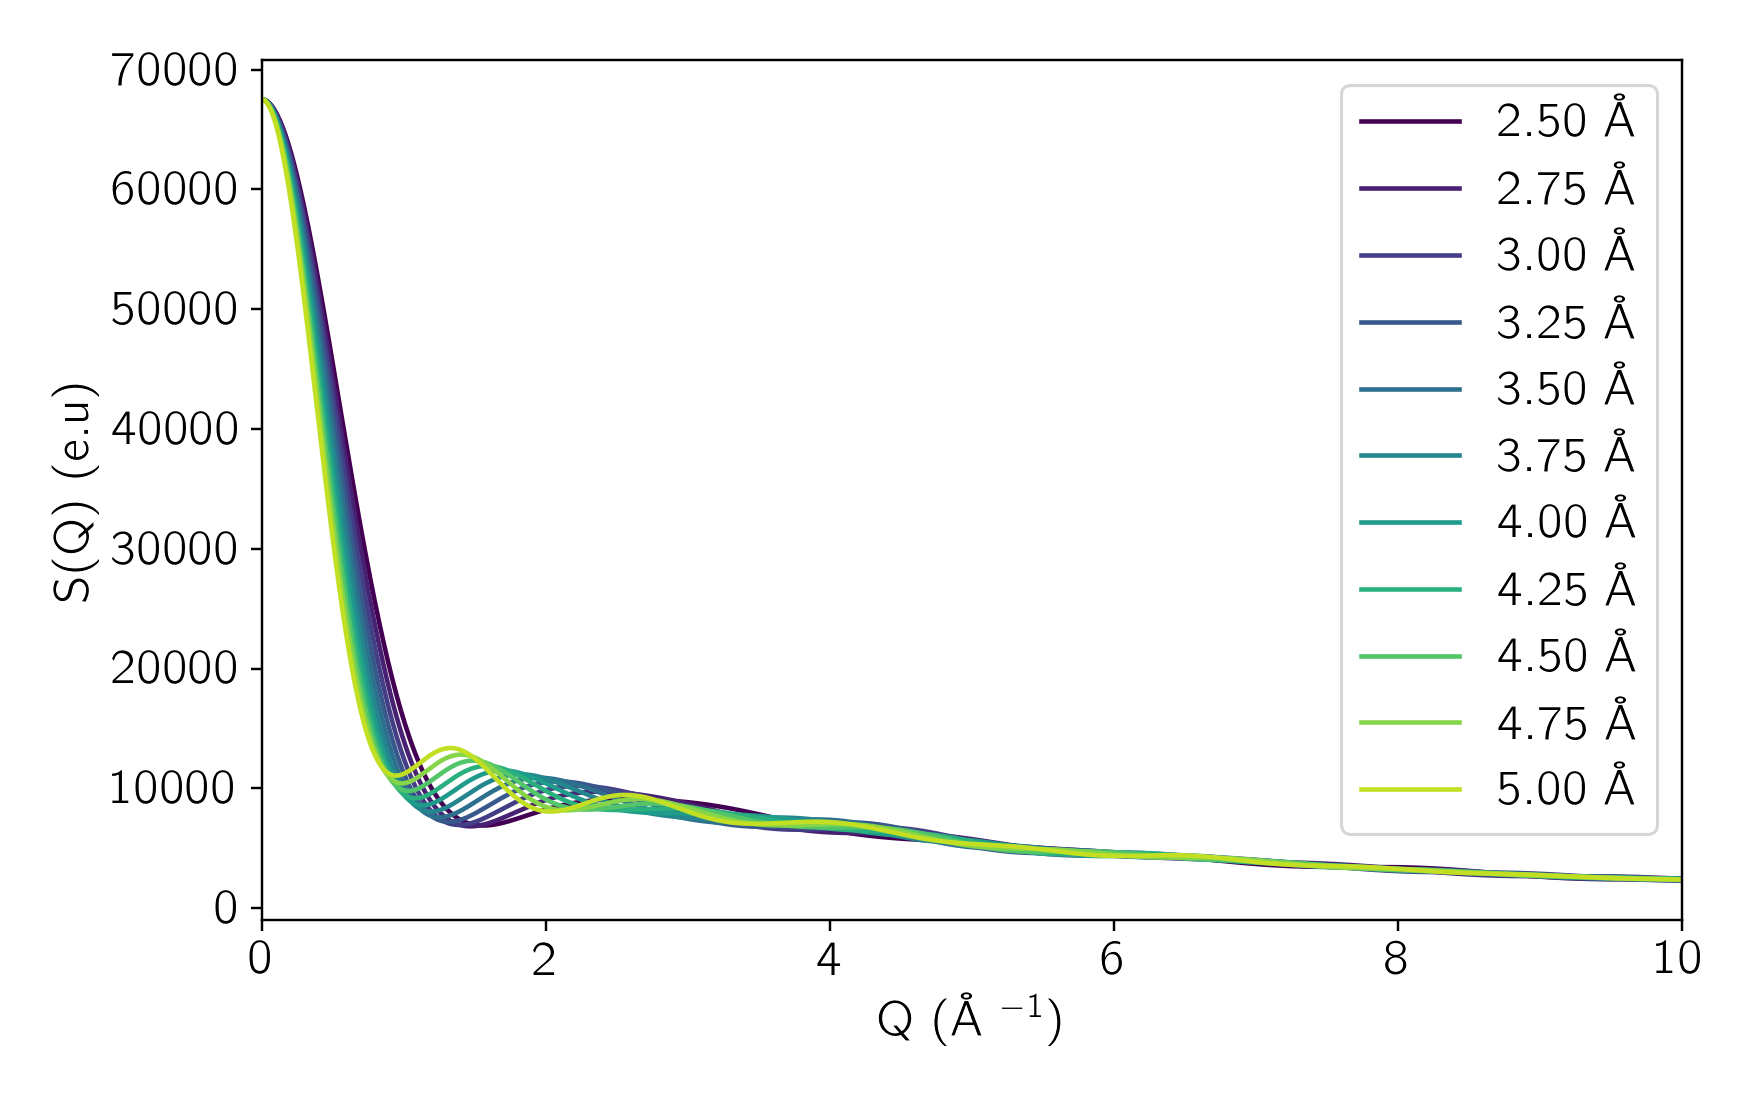

Text(0, 0.5, 'S(Q) (e.u)')

In [47]:
colors = make_colors(len(steps))
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for i, this_s in enumerate(s):
    ax.plot(deb.qvec, this_s, color=colors[i], label=f'{steps[i]:4.2f} Å')
ax.legend(loc='best')
ax.set_xlim([0, 10])
ax.set_xlabel('Q (Å $^{-1}$)')
ax.set_ylabel('S(Q) (e.u)')